In [2]:
#
# Chapter 9
# Modeling linear adsorption
#

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [29]:
def ratefn(t, y, cf_in, K, e, Pe, nz):
    
    # get c and q from y vector
    ym = y.reshape((nz, 2))
    c = ym[:, 0]
    q = ym[:, 1]
    
    dz = L / (nz + 1.0)
    
    # isotherm relation
    qe = K * c
    
    # rate of each species at each grid point in liquid phase
    
    dc = np.zeros(nz)
    # rate at internal grid points
    for i in range(1, nz - 1):
        dc[i] = -(c[i] - c[i - 1]) / dz + (1.0 / Pe) * (c[i + 1] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * (qe[i] - q[i])
    
    # rate at outlet edge grid
    i = nz - 1
    dc[i] = -(c[i] - c[i - 1]) / dz + (1.0 / Pe) * (c[i] - 2 * c[i] + c[i - 1]) / dz**2 - (1 - e) / e * (qe[i] - q[i])
    
    # rate at inlet edge grid
    i = 0
    cin = cf_in
    dc[i] = -(c[i] - cin) / dz + (1 / Pe) * (c[i + 1] - 2 * c[i] + cin) / dz**2 - (1 - e) / e * (qe[i] - q[i])
    
    # rate at solid adsorbent
    dq = np.zeros(nz)
    for i in range(nz):
        dq[i] = (qe[i] - q[i])
    
    # combine dc and dq vector into dy vector
    dy = np.column_stack((dc, dq)).reshape(2 * nz,)
        
    return dy

In [42]:
L = 1
Pe = 1000
K = 2
e = 0.4
cf_in = 1
nz = 100

In [43]:
c0 = np.zeros(nz)
q0 = np.zeros(nz)
y0 = np.column_stack((c0, q0)).reshape (2 * nz, )

In [44]:
ratefn_l = lambda t, c: ratefn(t, c, cf_in, K, e, Pe, nz)

In [45]:
ysol = solve_ivp(ratefn_l, [0, 1], y0, method = 'BDF', t_eval = np.arange(0.0, 1.1, 0.1))

In [46]:
ysolm = ysol.y.reshape((nz, 2, -1))
ysolm.shape
ysol_c = ysolm[:, 0, :]
ysol_q = ysolm[:, 1, :]

In [47]:
dz = L / (nz + 1)
z = np.arange(0, nz * dz, dz)
z, len(z)

(array([0.        , 0.00990099, 0.01980198, 0.02970297, 0.03960396,
        0.04950495, 0.05940594, 0.06930693, 0.07920792, 0.08910891,
        0.0990099 , 0.10891089, 0.11881188, 0.12871287, 0.13861386,
        0.14851485, 0.15841584, 0.16831683, 0.17821782, 0.18811881,
        0.1980198 , 0.20792079, 0.21782178, 0.22772277, 0.23762376,
        0.24752475, 0.25742574, 0.26732673, 0.27722772, 0.28712871,
        0.2970297 , 0.30693069, 0.31683168, 0.32673267, 0.33663366,
        0.34653465, 0.35643564, 0.36633663, 0.37623762, 0.38613861,
        0.3960396 , 0.40594059, 0.41584158, 0.42574257, 0.43564356,
        0.44554455, 0.45544554, 0.46534653, 0.47524752, 0.48514851,
        0.4950495 , 0.5049505 , 0.51485149, 0.52475248, 0.53465347,
        0.54455446, 0.55445545, 0.56435644, 0.57425743, 0.58415842,
        0.59405941, 0.6039604 , 0.61386139, 0.62376238, 0.63366337,
        0.64356436, 0.65346535, 0.66336634, 0.67326733, 0.68316832,
        0.69306931, 0.7029703 , 0.71287129, 0.72

Text(0, 0.5, 'c')

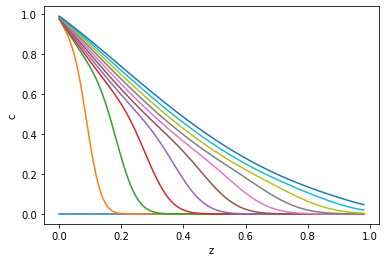

In [48]:
# Plot c
plt.plot(z, ysol_c)
plt.xlabel('z')
plt.ylabel('c')

Text(0.5, 0, 'q')

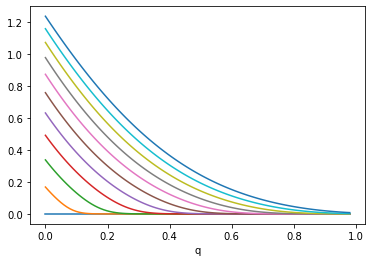

In [49]:
# Plot B
plt.plot(z, ysol_q)
plt.xlabel('z')
plt.xlabel('q')